<a href="https://colab.research.google.com/github/JosenildoVicente/estudo-comparativo-deteccao-fake-news/blob/main/Notebooks/preProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carregando conjuntos de dados

##Liar Dataset

In [3]:
dataset_liar_test = pd.read_table('/content/drive/MyDrive/datasets/Liar_dataset/test.tsv')
dataset_liar_train = pd.read_table('/content/drive/MyDrive/datasets/Liar_dataset/train.tsv')
dataset_liar_valid = pd.read_table('/content/drive/MyDrive/datasets/Liar_dataset/valid.tsv')

In [4]:
print(dataset_liar_test.columns.format(), dataset_liar_test.shape)
print(dataset_liar_train.columns.format(), dataset_liar_train.shape)
print(dataset_liar_valid.columns.format(), dataset_liar_valid.shape)

['id', 'label', 'statement', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'] (1267, 14)
['id', 'label', 'statement', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'] (10240, 14)
['id', 'label', 'statement', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'] (1284, 14)


In [5]:
dataset_liar_test = dataset_liar_test.drop(columns=['id', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'])
dataset_liar_train = dataset_liar_train.drop(columns=['id', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'])
dataset_liar_valid = dataset_liar_valid.drop(columns=['id', 'subject', 'speaker', "speaker's job", 'state', 'party filiation', 'barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts', 'the context'])

In [6]:
dataset_liar_test.rename(columns={'label':'Label', 'statement':'Text'}, inplace = True)
dataset_liar_train.rename(columns={'label':'Label', 'statement':'Text'}, inplace = True)
dataset_liar_valid.rename(columns={'label':'Label', 'statement':'Text'}, inplace = True)

In [7]:
print(dataset_liar_test.columns.format(), dataset_liar_test.shape)
print(dataset_liar_train.columns.format(), dataset_liar_train.shape)
print(dataset_liar_valid.columns.format(), dataset_liar_valid.shape)

['Label', 'Text'] (1267, 2)
['Label', 'Text'] (10240, 2)
['Label', 'Text'] (1284, 2)


In [8]:
dataset_liar = pd.concat([dataset_liar_test, dataset_liar_train, dataset_liar_valid], ignore_index = True)

In [9]:
print(dataset_liar.columns.format(), dataset_liar.shape)

['Label', 'Text'] (12791, 2)


In [10]:
dataset_liar.head(3)

,Label,Text
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...


In [11]:
dataset_liar = dataset_liar.reindex(['Text', 'Label'], axis=1)

In [12]:
dataset_liar.head(3)

,Text,Label
0,Building a wall on the U.S.-Mexico border will...,true
1,Wisconsin is on pace to double the number of l...,false
2,Says John McCain has done nothing to help the ...,false


In [13]:
print("Dimensão do Conjunto de dados: ", dataset_liar.shape)
print("Nome das colunas: ", dataset_liar.columns.format())
print("Balanceamento dos dados: \n", dataset_liar['Label'].value_counts())
print("Tamanho médio dos textos: ", dataset_liar['Text'].str.len().mean())

Dimensão do Conjunto de dados:  (12791, 2)
Nome das colunas:  ['Text', 'Label']
Balanceamento dos dados: 
 half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: Label, dtype: int64
Tamanho médio dos textos:  107.16151981862247


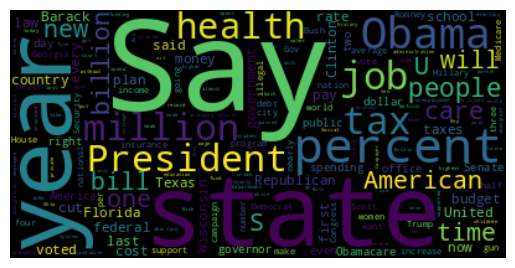

In [14]:
#Nuvem de palavras
texto = " ".join(t for t in dataset_liar.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(texto)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_liar.pdf', dpi=1000)
plt.show()

##Isot Dataset

In [15]:
dataset_isot_fake = pd.read_csv('/content/drive/MyDrive/datasets/Isot_dataset/Fake.csv')
dataset_isot_true = pd.read_csv('/content/drive/MyDrive/datasets/Isot_dataset/True.csv')

In [16]:
print(dataset_isot_fake.columns.format(), dataset_isot_fake.shape)
print(dataset_isot_true.columns.format(), dataset_isot_true.shape)

['title', 'text', 'subject', 'date'] (23481, 4)
['title', 'text', 'subject', 'date'] (21417, 4)


In [17]:
dataset_isot_fake = dataset_isot_fake.drop(columns=['title', 'subject', 'date'])
dataset_isot_true = dataset_isot_true.drop(columns=['title', 'subject', 'date'])

In [18]:
dataset_isot_fake.rename(columns={'text':'Text'}, inplace = True)
dataset_isot_true.rename(columns={'text':'Text'}, inplace = True)

In [19]:
dataset_isot_fake['Label'] = 'FAKE'
dataset_isot_true['Label'] = 'REAL'

In [20]:
print(dataset_isot_fake.columns.format(), dataset_isot_fake.shape)
print(dataset_isot_true.columns.format(), dataset_isot_true.shape)

['Text', 'Label'] (23481, 2)
['Text', 'Label'] (21417, 2)


In [21]:
dataset_isot = pd.merge(dataset_isot_true,dataset_isot_fake, how='outer')

In [22]:
print(dataset_isot.columns.format(), dataset_isot.shape)

['Text', 'Label'] (44898, 2)


In [23]:
dataset_isot.head(3)

,Text,Label
0,WASHINGTON (Reuters) - The head of a conservat...,REAL
1,WASHINGTON (Reuters) - Transgender people will...,REAL
2,WASHINGTON (Reuters) - The special counsel inv...,REAL


In [24]:
print("Dimensão do Conjunto de dados: ", dataset_isot.shape)
print("Nome das colunas: ", dataset_isot.columns.format())
print("Balanceamento dos dados: \n", dataset_isot['Label'].value_counts())
print("Tamanho médio dos textos: ", dataset_isot['Text'].str.len().mean())

Dimensão do Conjunto de dados:  (44898, 2)
Nome das colunas:  ['Text', 'Label']
Balanceamento dos dados: 
 FAKE    23481
REAL    21417
Name: Label, dtype: int64
Tamanho médio dos textos:  2469.1096930820972


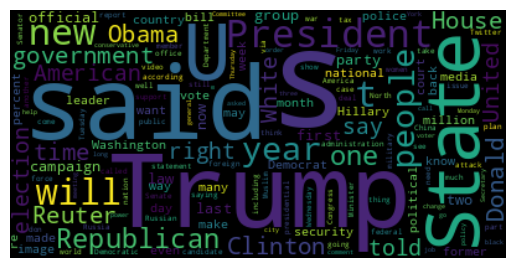

In [25]:
#Nuvem de palavras
texto = " ".join(t for t in dataset_isot.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(texto)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_isot.pdf', dpi=1000)
plt.show()

##Covid Dataset

In [26]:
dataset_covid_test = pd.read_csv('/content/drive/MyDrive/datasets/Covid_dataset/english_test_with_labels.csv')
dataset_covid_train = pd.read_csv('/content/drive/MyDrive/datasets/Covid_dataset/Constraint_Train.csv')
dataset_covid_valid = pd.read_csv('/content/drive/MyDrive/datasets/Covid_dataset/Constraint_Val.csv')

In [27]:
print(dataset_covid_test.columns.format(), dataset_covid_test.shape)
print(dataset_covid_train.columns.format(), dataset_covid_train.shape)
print(dataset_covid_valid.columns.format(), dataset_covid_valid.shape)

['id', 'tweet', 'label'] (2140, 3)
['id', 'tweet', 'label'] (6420, 3)
['id', 'tweet', 'label'] (2140, 3)


In [28]:
dataset_covid_test = dataset_covid_test.drop(columns=['id'])
dataset_covid_train = dataset_covid_train.drop(columns=['id'])
dataset_covid_valid = dataset_covid_valid.drop(columns=['id'])

In [29]:
dataset_covid_test.rename(columns={'label':'Label', 'tweet':'Text'}, inplace = True)
dataset_covid_train.rename(columns={'label':'Label', 'tweet':'Text'}, inplace = True)
dataset_covid_valid.rename(columns={'label':'Label', 'tweet':'Text'}, inplace = True)

In [30]:
print(dataset_covid_test.columns.format(), dataset_covid_test.shape)
print(dataset_covid_train.columns.format(), dataset_covid_train.shape)
print(dataset_covid_valid.columns.format(), dataset_covid_valid.shape)

['Text', 'Label'] (2140, 2)
['Text', 'Label'] (6420, 2)
['Text', 'Label'] (2140, 2)


In [31]:
dataset_covid = pd.concat([dataset_covid_test, dataset_covid_train, dataset_covid_valid], ignore_index = True)

In [32]:
print(dataset_covid.columns.format(), dataset_covid.shape)

['Text', 'Label'] (10700, 2)


In [33]:
dataset_covid.head(3)

,Text,Label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake


In [34]:
print("Dimensão do Conjunto de dados: ", dataset_covid.shape)
print("Nome das colunas: ", dataset_covid.columns.format())
print("Balanceamento dos dados: \n", dataset_covid['Label'].value_counts())
print("Tamanho médio dos textos: ", dataset_covid['Text'].str.len().mean())

Dimensão do Conjunto de dados:  (10700, 2)
Nome das colunas:  ['Text', 'Label']
Balanceamento dos dados: 
 real    5600
fake    5100
Name: Label, dtype: int64
Tamanho médio dos textos:  181.89429906542057


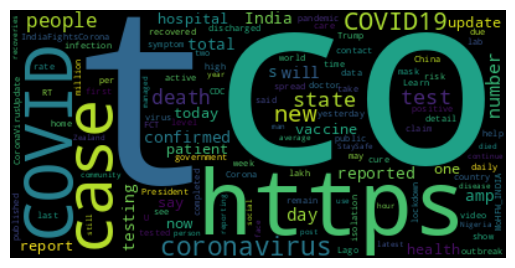

In [35]:
#Nuvem de palavras
texto = " ".join(t for t in dataset_covid.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(texto)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_covid.pdf', dpi=1000)
plt.show()

##George McIntire (GM) Dataset

In [36]:
dataset_gm = pd.read_csv('/content/drive/MyDrive/datasets/GM_dataset/fake_or_real_news.csv')

In [37]:
dataset_gm.head(3)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [38]:
dataset_gm.columns.format()

['Unnamed: 0', 'title', 'text', 'label']

In [39]:
dataset_gm = dataset_gm.drop(columns=['Unnamed: 0', 'title'])

In [40]:
dataset_gm.rename(columns={'text':'Text', 'label':'Label'}, inplace = True)

In [41]:
dataset_gm.head(3)

,Text,Label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [42]:
print("Dimensão do Conjunto de dados: ", dataset_gm.shape)
print("Nome das colunas: ", dataset_gm.columns.format())
print("Balanceamento dos dados: \n", dataset_gm['Label'].value_counts())
print("Tamanho médio dos textos: ", dataset_gm['Text'].str.len().mean())

Dimensão do Conjunto de dados:  (6335, 2)
Nome das colunas:  ['Text', 'Label']
Balanceamento dos dados: 
 REAL    3171
FAKE    3164
Name: Label, dtype: int64
Tamanho médio dos textos:  4707.250355169692


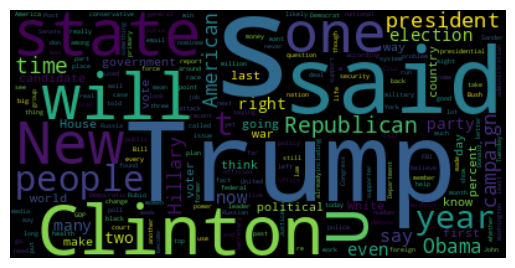

In [43]:
#Nuvem de palavras
texto = " ".join(t for t in dataset_gm.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(texto)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_gm.pdf', dpi=1000)
plt.show()

#Pré-Processamento

##Carregando bibliotecas

In [44]:
import nltk
import re
from unicodedata import normalize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk import word_tokenize
from sklearn.model_selection import train_test_split

In [45]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [46]:
emocoes = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

##Funções

In [47]:
def lowercase(Text):
    lower_text = Text.lower()
    return lower_text

In [48]:
def Clean(text):
    # Removendo URLS
    new_text = re.sub(r"http\S+", " ", text)
    # Removendo RT
    new_text = re.sub('RT @[\w_]+: ', ' ', new_text)
    # Removendo tags
    new_text = re.sub(r"@\S+", " ", new_text)
    # removing special characters
    new_text = normalize('NFKD', new_text).encode('ASCII', 'ignore').decode('ASCII')
    new_text = re.sub('[0-9]', ' ', str(new_text))
    new_text = re.sub('\s+', ' ', new_text)
    return new_text

In [49]:
def remove_punctuation(Text):
    punctuationfree="".join([i for i in Text if i not in string.punctuation])
    return punctuationfree

In [50]:
def remove_whitespace(Text):
    whitespacefree = Text.strip()
    return whitespacefree

In [51]:
def remove_stopwords(Text):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_text = [word for word in Text if word not in stopwords]
    return clean_text

In [52]:
def stemmer(Text):
    stemmer = PorterStemmer()
    stem_text = [stemmer.stem(w) for w in Text]
    return stem_text

In [53]:
def lemmatizer(Text):
  lemmatizer = WordNetLemmatizer()
  lemm_text = [lemmatizer.lemmatize(w) for w in Text]
  return lemm_text

In [54]:
def remove_emoji(Text):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', Text)

In [55]:
def remove_emoticons(Text):
  emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in emocoes) + u')')
  return emoticon_pattern.sub(r'', Text)

##Pré-processamento dos conjuntos de dados

###Liar

In [56]:
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: lowercase(x))
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: Clean(x))
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: remove_punctuation(x))
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: remove_whitespace(x))
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: remove_emoji(x))
dataset_liar['Text'] = dataset_liar['Text'].apply(lambda x: remove_emoticons(x))
dataset_liar['Token'] = dataset_liar['Text'].apply(word_tokenize)
dataset_liar['Token'] = dataset_liar['Token'].apply(lambda x: remove_stopwords(x))
dataset_liar['Token'] = dataset_liar['Token'].apply(lambda x: stemmer(x))
dataset_liar['Token'] = dataset_liar['Token'].apply(lambda x: lemmatizer(x))
print("Conjunto de dados Liar pré-processados!")

Conjunto de dados Liar pré-processados!


In [57]:
dataset_liar.to_csv("dataframe_liar.csv", encoding = 'utf-8')

###Isot

In [58]:
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: lowercase(x))
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: Clean(x))
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: remove_punctuation(x))
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: remove_whitespace(x))
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: remove_emoji(x))
dataset_isot['Text'] = dataset_isot['Text'].apply(lambda x: remove_emoticons(x))
dataset_isot["Token"] = dataset_isot['Text'].apply(word_tokenize)
dataset_isot['Token'] = dataset_isot['Token'].apply(lambda x: remove_stopwords(x))
dataset_isot['Token'] = dataset_isot['Token'].apply(lambda x: stemmer(x))
dataset_isot['Token'] = dataset_isot['Token'].apply(lambda x: lemmatizer(x))
print("Conjunto de dados Isot pré-processados!")

Conjunto de dados Isot pré-processados!


In [59]:
dataset_isot.to_csv("dataframe_isot.csv", encoding = 'utf-8')

###Covid

In [60]:
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: lowercase(x))
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: Clean(x))
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: remove_punctuation(x))
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: remove_whitespace(x))
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: remove_emoji(x))
dataset_covid['Text'] = dataset_covid['Text'].apply(lambda x: remove_emoticons(x))
dataset_covid['Token'] = dataset_covid['Text'].apply(word_tokenize)
dataset_covid['Token'] = dataset_covid['Token'].apply(lambda x: remove_stopwords(x))
dataset_covid['Token'] = dataset_covid['Token'].apply(lambda x: stemmer(x))
dataset_covid['Token'] = dataset_covid['Token'].apply(lambda x: lemmatizer(x))
print("Conjunto de dados Covid pré-processados!")

Conjunto de dados Covid pré-processados!


In [61]:
dataset_covid.to_csv("dataframe_covid.csv", encoding = 'utf-8')

###George McIntire

In [62]:
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: lowercase(x))
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: Clean(x))
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: remove_punctuation(x))
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: remove_whitespace(x))
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: remove_emoji(x))
dataset_gm['Text'] = dataset_gm['Text'].apply(lambda x: remove_emoticons(x))
dataset_gm['Token'] = dataset_gm['Text'].apply(word_tokenize)
dataset_gm['Token'] = dataset_gm['Token'].apply(lambda x: remove_stopwords(x))
dataset_gm['Token'] = dataset_gm['Token'].apply(lambda x: stemmer(x))
dataset_gm['Token'] = dataset_gm['Token'].apply(lambda x: lemmatizer(x))
print("Conjunto de dados GM pré-processados!")

Conjunto de dados GM pré-processados!


In [63]:
dataset_gm.to_csv("dataframe_gm.csv", encoding = 'utf-8')